In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import re
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] =False
%matplotlib widget

In [2]:
def extra_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    local_times = []
    node1_times = []
    pattern = r'Local time : (\d+)\nNode1 time : (\d+)'
    matches = re.findall(pattern, data)
    for match in matches:
        local_times.append(int(match[0]))
        node1_times.append(int(match[1]))
    return np.array(local_times),np.array(node1_times)

In [3]:
# 只取前面300个点
N = 300
x = np.arange(N)

# rtc的数据
local_times_rtc,node1_times_rtc = extra_data('time_drift_rtc.txt')
local_times_rtc = local_times_rtc[0:N] 
node1_times_rtc = node1_times_rtc[0:N] + 12000000

# high-resolution的数据
local_times_hrt,node1_times_hrt = extra_data('time_drift_hrt.txt')
local_times_hrt = local_times_hrt[0:N]
node1_times_hrt = node1_times_hrt[0:N]+18000000

# 计算时间偏移
delta_rtc = node1_times_rtc - local_times_rtc
delta_hrt = node1_times_hrt - local_times_hrt

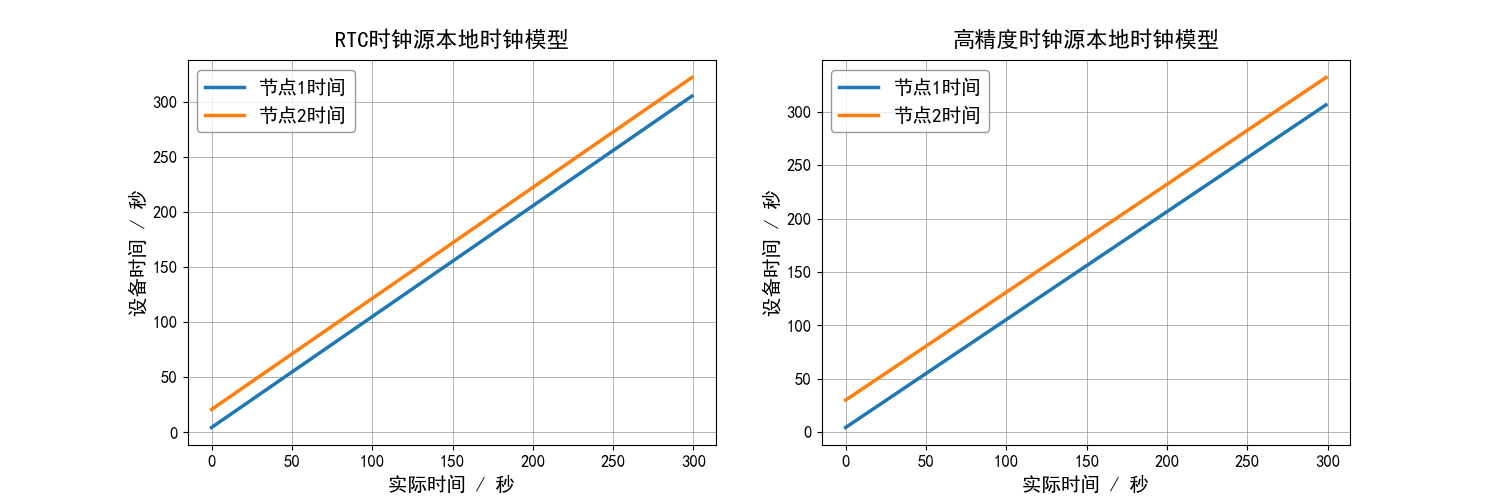

In [4]:
# 时钟模型绘图
def plot_time_model(ax, x, local_times, node_times, title):
    ax.plot(x, local_times / 1e6, label='节点1时间', linewidth=2.5, color='#1f77b4')
    ax.plot(x, node_times / 1e6, label='节点2时间', linewidth=2.5, color='#ff7f0e')

    # 设置标题和标签
    ax.set_title(title, fontsize=16, fontweight='bold', pad=10)  # 增加标题和图形间距
    ax.set_xlabel('实际时间 / 秒', fontsize=14)  # x轴标签和轴间距
    ax.set_ylabel('设备时间 / 秒', fontsize=14)  # y轴标签和轴间距
    # 添加网格，淡化线条以突出数据
    ax.grid(True, linewidth=0.7, alpha=0.6, color='gray')
    # 增加图例，靠近数据区域
    ax.legend(fontsize=14, loc='best', frameon=True, shadow=False, edgecolor='gray')
    # 调整刻度标签字体大小
    ax.tick_params(axis='both', which='major', labelsize=12)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 一行两列布局
# 绘制第一个子图：RTC时钟源设备时钟模型
plot_time_model(axs[0], x, local_times_rtc, node1_times_rtc, title='RTC时钟源本地时钟模型')
# 绘制第二个子图：高精度时钟源设备时钟模型
plot_time_model(axs[1], x, local_times_hrt, node1_times_hrt, title='高精度时钟源本地时钟模型')
plt.savefig('时钟模型.png', dpi=600, bbox_inches='tight')
plt.show()

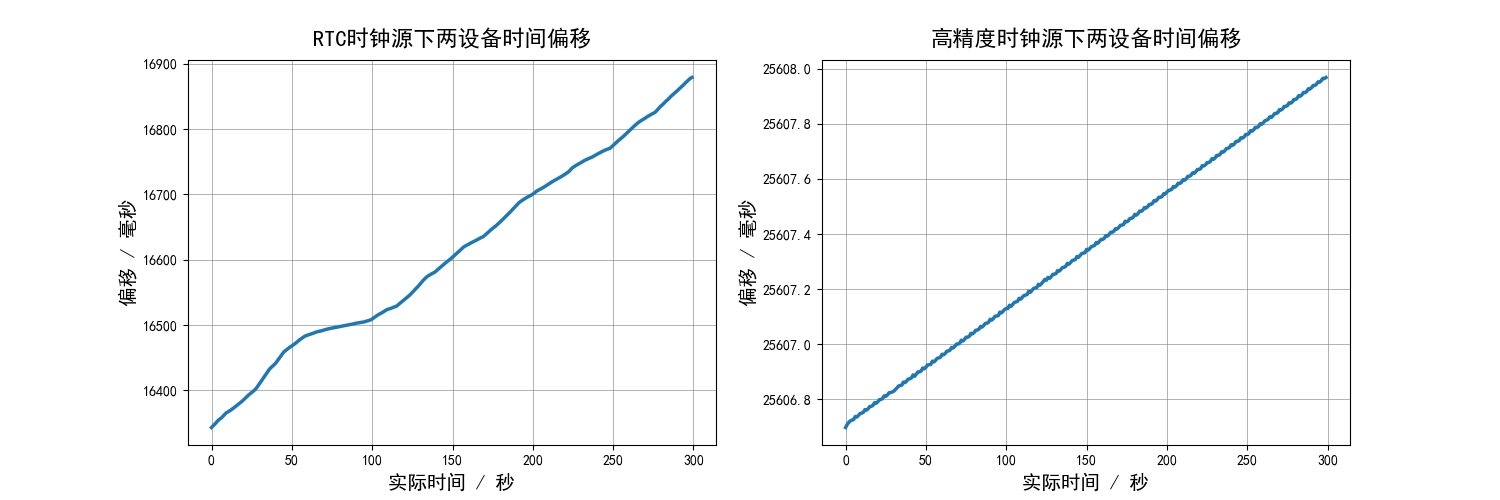

In [5]:
# 时钟偏移绘图
def plot_time_drift(ax, x, delta, title):
    ax.plot(x, delta / 1e3, linewidth=2.5)
    # 设置标题和标签
    ax.set_title(title, fontsize=16, fontweight='bold', pad=10)  # 增加标题和图形间距
    ax.set_xlabel('实际时间 / 秒', fontsize=14)  # x轴标签和轴间距
    ax.set_ylabel('偏移 / 毫秒', fontsize=14)  # y轴标签和轴间距
    # 添加网格，淡化线条以突出数据
    ax.grid(True, linewidth=0.7, alpha=0.6, color='gray')
    # 设置纵坐标不使用偏差法
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.get_major_formatter().set_useOffset(False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 一行两列布局
# 绘制第一个子图：RTC时钟源下两设备时间偏移
plot_time_drift(axs[0], x, delta_rtc, title='RTC时钟源下两设备时间偏移')
# 绘制第二个子图：高精度时钟源下两设备时间偏移
plot_time_drift(axs[1], x, delta_hrt, title='高精度时钟源下两设备时间偏移')
plt.savefig('时间漂移.png', dpi=600, bbox_inches='tight')
plt.show()

In [6]:
print(delta_rtc[0],delta_rtc[-1],delta_rtc[-1]-delta_rtc[0])
print(delta_hrt[0],delta_hrt[-1],delta_hrt[-1]-delta_hrt[0])

16343113 16878924 535811
25606697 25607968 1271
